In [1]:
# Autoreload
%load_ext autoreload

In [2]:
import os 
# Traverse the current working directory backwards to find the  directory with name "workspace"
workspace_dir = os.getcwd()
while os.path.basename(workspace_dir) != 'ai4ar-helper':
    workspace_dir = os.path.dirname(workspace_dir)

data_dir = os.path.join(workspace_dir,'..','ai4ar-radiomics', 'data', 'trial')

In [3]:
import logging

# Set up logging to sout, with level DEBUG 
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s %(message)s', datefmt='%Y-%m-%d %H:%M:%S')

In [4]:
# Add src to the path
import sys
sys.path.append(os.path.join(workspace_dir, 'src'))


In [5]:
data_dir

'd:\\workspace\\ai4ar-helper\\..\\ai4ar-radiomics\\data\\trial'

In [6]:
from ai4ar import Dataset, Case, select_slice, required_agreement, modalities

2022-12-25 20:38:48 DEBUG matplotlib data path: d:\workspace\ai4ar-helper\ai4ar-helper-env\lib\site-packages\matplotlib\mpl-data
2022-12-25 20:38:48 DEBUG CONFIGDIR=C:\Users\ptrsb\.matplotlib
2022-12-25 20:38:48 DEBUG interactive is False
2022-12-25 20:38:48 DEBUG platform is win32
2022-12-25 20:38:48 DEBUG loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', 'site', 'os', 'stat', '_stat', '_collections_abc', 'ntpath', 'genericpath', 'os.path', '_sitebuiltins', '_bootlocale', '_locale', 'encodings.cp1250', 'types', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'collections', 'operator', '_operator', 'keyword', 'heapq', '

In [7]:
dataset = Dataset(data_dir)

In [8]:
dataset.case_ids

['001', '003', '004', '005']

In [9]:
case = dataset['001']


In [10]:
case.images_keys()

['data/adc',
 'data/cor',
 'data/dce1',
 'data/dce2',
 'data/dce3',
 'data/dce4',
 'data/dce5',
 'data/dce6',
 'data/hbv',
 'data/sag',
 'data/t2w',
 'lesion_labels/lesion1/adc/8ZmM76',
 'lesion_labels/lesion1/adc/OjmNZ8',
 'lesion_labels/lesion1/adc/OrjnrO',
 'lesion_labels/lesion1/dce3/OrjnrO',
 'lesion_labels/lesion1/hbv/8ZmM76',
 'lesion_labels/lesion1/hbv/OjmNZ8',
 'lesion_labels/lesion1/hbv/OrjnrO',
 'lesion_labels/lesion1/t2w/8ZmM76',
 'lesion_labels/lesion1/t2w/OjmNZ8',
 'lesion_labels/lesion1/t2w/OrjnrO']

2022-12-25 20:38:48 DEBUG Loaded backend module://matplotlib_inline.backend_inline version unknown.
2022-12-25 20:38:48 DEBUG Loaded backend module://matplotlib_inline.backend_inline version unknown.
2022-12-25 20:38:48 DEBUG findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2022-12-25 20:38:48 DEBUG findfont: score(FontEntry(fname='d:\\workspace\\ai4ar-helper\\ai4ar-helper-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-12-25 20:38:48 DEBUG findfont: score(FontEntry(fname='d:\\workspace\\ai4ar-helper\\ai4ar-helper-env\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif.ttf', name='DejaVu Serif', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-12-25 20:38:48 DEBUG findfont: score(FontEntry(fname='d:\\workspace\\ai4ar-helper

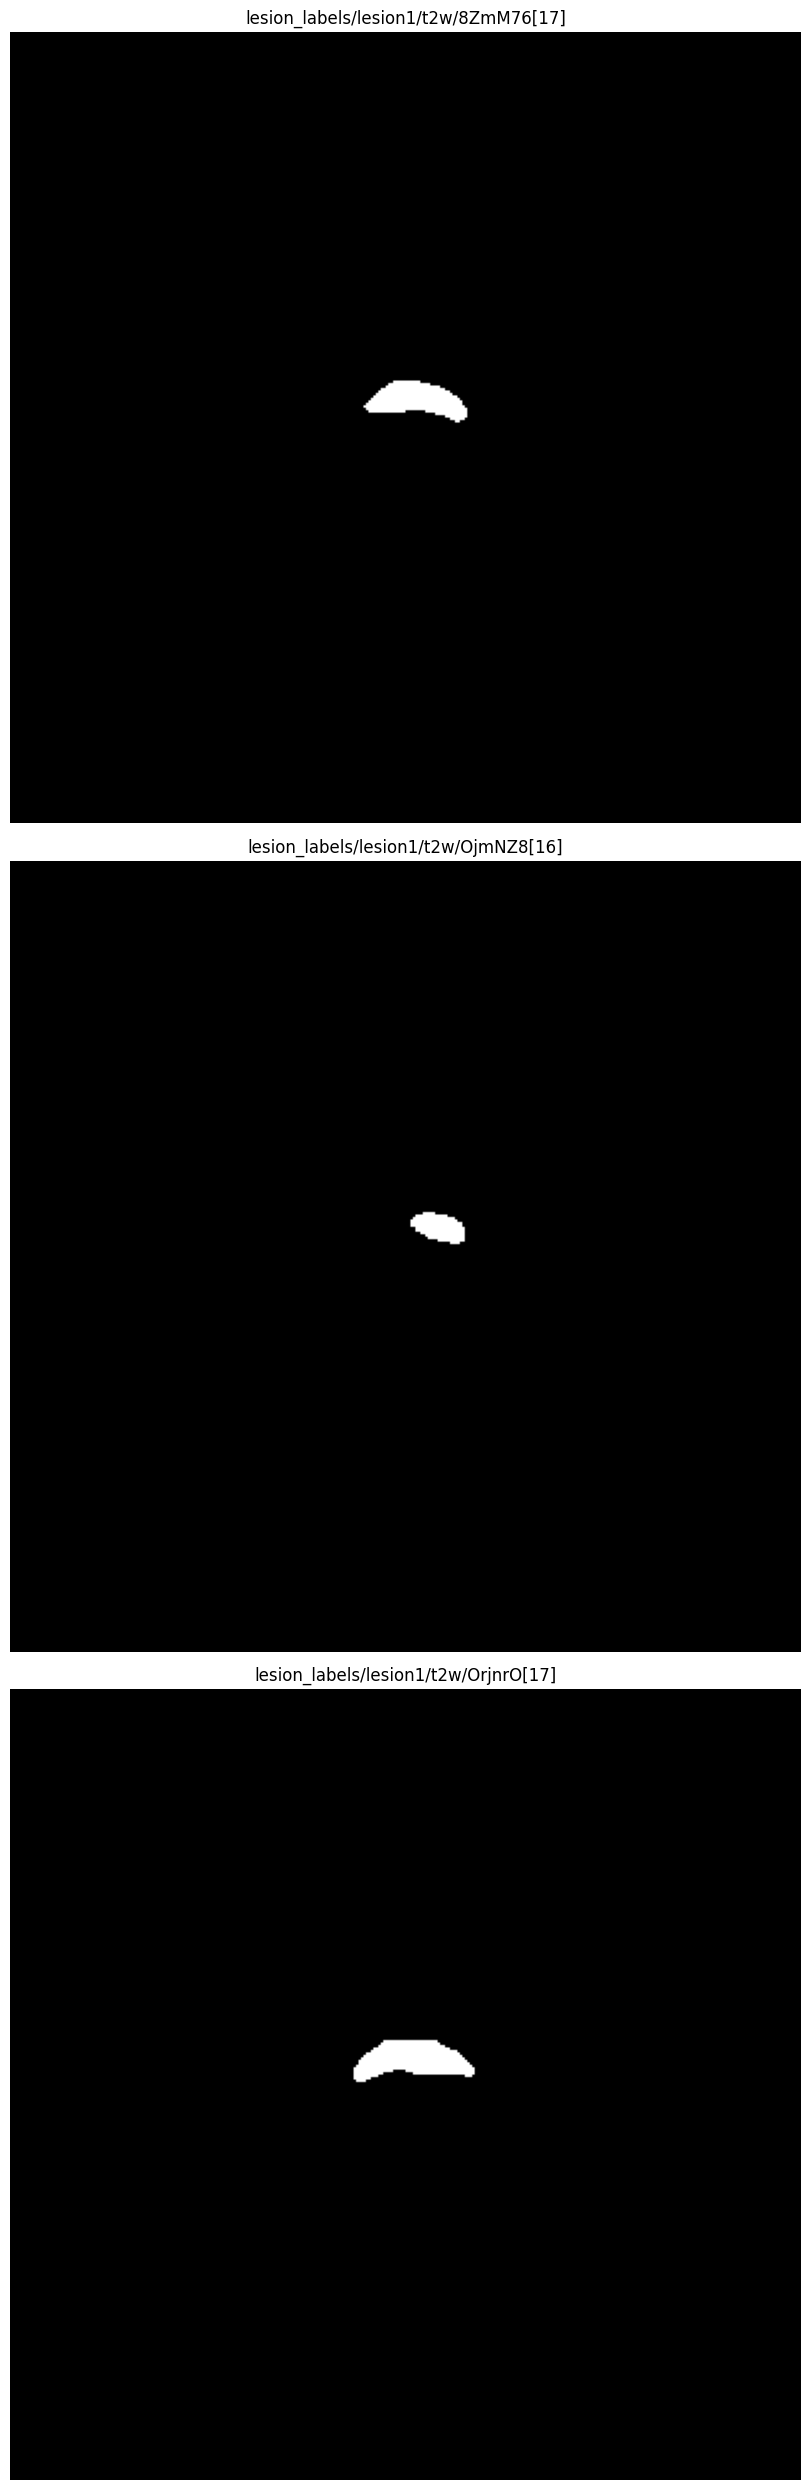

In [11]:
case.visualize('lesion_labels/lesion1/t2w/')

In [12]:
dat = case.images_match('lesion_labels/')


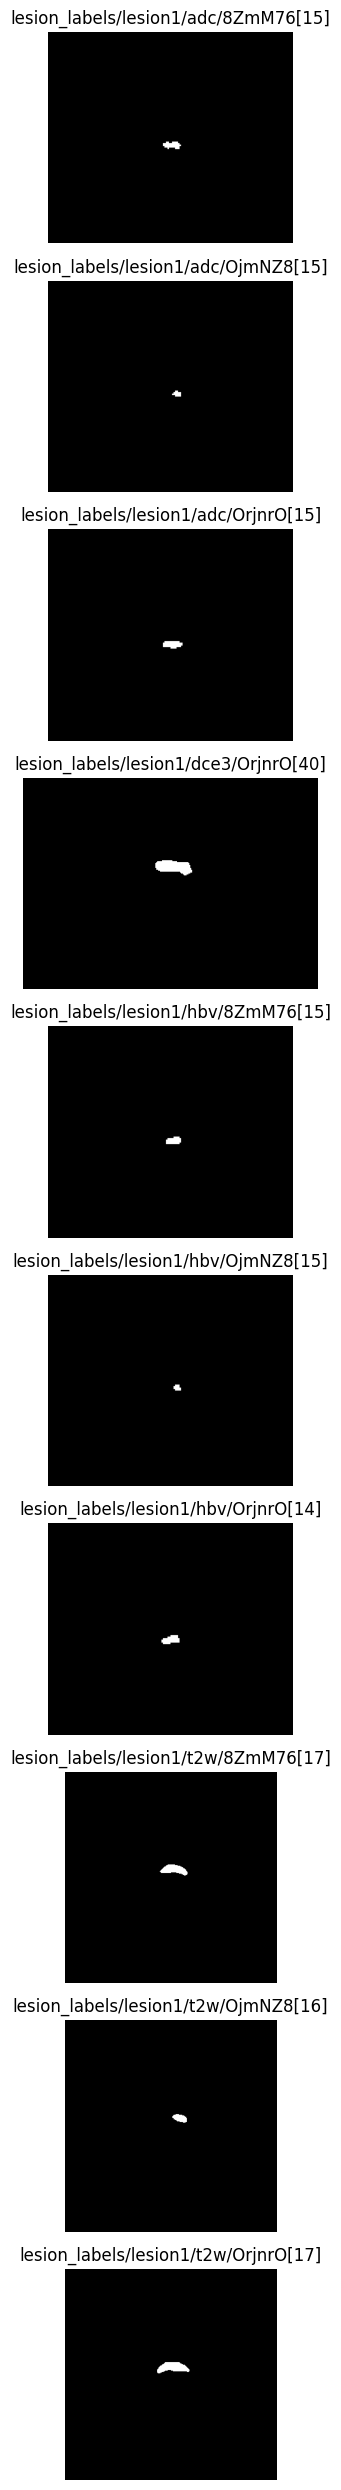

In [13]:
case.visualize('lesion_labels/')

In [14]:
import matplotlib.pyplot as plt
import logging 

logging.basicConfig(level=logging.INFO)

combined_t2w_mask = case.image('lesion_labels/lesion1/t2w', combine=True, cache=False, combine_pp=required_agreement(1))
mask_arr = combined_t2w_mask.arr()
# Visualize the combined mask

plt.imshow(mask_arr[select_slice(mask_arr)], cmap='gray', vmin=0, vmax=1)

2022-12-25 20:38:50 DEBUG there is data
2022-12-25 20:38:50 DEBUG Try combine
2022-12-25 20:38:50 DEBUG path: combined/lesion_labels/lesion1/t2w
2022-12-25 20:38:50 DEBUG try combine


TypeError: __init__() missing 1 required positional argument: 'path'

In [ ]:
case.data.match('lesion_labels/lesion1/t2w/*')

In [ ]:
dataset.clinical_metadata

In [ ]:
dataset.radiological_metadata

In [ ]:
case.clinical_metadata()